---

<div align="center">

# 🐾 **Felis Taxonomy Classification | EfficientNetV2** 🐾  
### *Course Project - Deep Learning*

</div>

---

#### **`Part I | Transfer Learning`**

| **Author**        | Shagun                                          |
|--------------------|------------------------------------------------|
| **School**        | School of Computing & Data Science, Sai University |
| **Email ID**      | shagun.s-26@scds.saiuniversity.edu.in          |
| **Date Created**  | 26/12/2024                                     |

---

### **🔍 Project Overview**

- **Problem**: `Image Classification`
- **Dataset**: `Felis Taxonomy`
- **Model**: `EfficientNetV2`
- **Key Library Used**: `TensorFlow Keras`

---

### **📄 Description**

This section focuses on the **classification of Felis (cat) images** into **7 types** using **Transfer Learning**. The pre-trained **EfficientNetV2 model** serves as the feature extractor, leveraging its advanced architecture to enhance the accuracy of predictions on the provided dataset.

---

<div align="center">

✨ Happy Coding! ✨

</div>


## Downloading and preparing the data

In [1]:
# Import required libraries

import numpy as np
np.random.seed(42)

import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
print(tf.__version__)

from tensorflow import keras
tf.random.set_seed(42)

2.17.1


In [2]:
import os
import glob
import PIL
from PIL import Image

In [3]:
from google.colab import drive
import glob

# Mount Google Drive
drive.mount('/content/drive')

# from drive
imgFiles = glob.glob("/content/drive/MyDrive/Felis_Taxonomy/*/*.jpg")


Mounted at /content/drive


In [4]:
print(len(imgFiles))

519


In [5]:
for items in imgFiles[:8]:
  print(items)

/content/drive/MyDrive/Felis_Taxonomy/sand-cat/sd (10).jpg
/content/drive/MyDrive/Felis_Taxonomy/sand-cat/sd (1).jpg
/content/drive/MyDrive/Felis_Taxonomy/sand-cat/sd (18).jpg
/content/drive/MyDrive/Felis_Taxonomy/sand-cat/sd (26).jpg
/content/drive/MyDrive/Felis_Taxonomy/sand-cat/sd (24).jpg
/content/drive/MyDrive/Felis_Taxonomy/sand-cat/sd (20).jpg
/content/drive/MyDrive/Felis_Taxonomy/sand-cat/sd (2).jpg
/content/drive/MyDrive/Felis_Taxonomy/sand-cat/sd (27).jpg


In [6]:
## Preparing a dataset from the directories of image files

images = []
labels = []

# To check number of colour channels present in the images
c1, c3, c4 = 0, 0, 0

for fName in imgFiles:
  img = Image.open(fName)
  shape = np.array(img).shape

  if(len(shape) == 2):    # If image is single-channel, convert to 3-channel RGB
    c1 += 1
    img = img.convert(mode='RGB')
  elif(shape[-1] == 4):    # If image is 4-channel, remove redundant 'transparency' channel (4th)
    c4 += 1
    img = Image.fromarray(np.array(img)[:, :, :3])
  else:
    c3 += 1

  img = img.resize((299,299))
  # img = np.array(img) / 255.0    # Normalize to range 0-1 (only scaling, not stretching)
  images.append(np.array(img))

  imgpath = fName.split("/")
  label = imgpath[-2]
  labels.append(label)

print(f"\n{c1} images had single colour channel")
print(f"{c3} images had 3 colour channels (RGB)")
print(f"{c4} images had 4 colour channels")




0 images had single colour channel
519 images had 3 colour channels (RGB)
0 images had 4 colour channels


In [7]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.applications.efficientnet_v2 import preprocess_input  # Correct preprocessing function

# Encoding the class labels
le = LabelEncoder()
y = le.fit_transform(labels)

print(f"Classes: {le.classes_}")  # Unique class names
print(f"Encoded: {set(y)}")  # Unique classes (encoded)

# Preprocess the images for EfficientNetV2
X = preprocess_input(np.array(images))  # Use the correct preprocessing function
y = np.array(y)

print(f"\nShape of X: {X.shape}")
print(f"Shape of y: {y.shape}")


Classes: ['african-wildcat' 'blackfoot-cat' 'chinese-mountain-cat' 'domestic-cat'
 'european-wildcat' 'jungle-cat' 'sand-cat']
Encoded: {0, 1, 2, 3, 4, 5, 6}

Shape of X: (519, 299, 299, 3)
Shape of y: (519,)


In [8]:
print(f"-> Total number of images: {y.shape[0]}\n")
print("-> Class wise distribution:")
unique_classes, class_counts = np.unique(y, return_counts=True)
for cls, count in zip(unique_classes, class_counts):
    print(f"Class {cls} ({le.classes_[cls]}): {count} images")

-> Total number of images: 519

-> Class wise distribution:
Class 0 (african-wildcat): 91 images
Class 1 (blackfoot-cat): 79 images
Class 2 (chinese-mountain-cat): 42 images
Class 3 (domestic-cat): 64 images
Class 4 (european-wildcat): 85 images
Class 5 (jungle-cat): 86 images
Class 6 (sand-cat): 72 images


In [9]:
# Split data into 75% training, 25% testing while maintaining proportions of each class
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    stratify=y, random_state=42)
print(f"No. of training samples: {X_train.shape[0]}")
print(f"No. of testing samples: {X_test.shape[0]}")

# Normalizing the data
mu = X_train.mean()
std = X_train.std()

X_train_std = (X_train - mu) / std
X_test_std = (X_test - mu) / std

No. of training samples: 389
No. of testing samples: 130


In [10]:
print(set(labels))

{'blackfoot-cat', 'chinese-mountain-cat', 'domestic-cat', 'sand-cat', 'european-wildcat', 'jungle-cat', 'african-wildcat'}


In [11]:
print(len(images))

519


In [12]:
print(len(labels))

519


### Dataset Overview

- **Total number of images:** 519  
- **Class-wise distribution:**  
  - **Class 0** (African Wildcat): 91 images  
  - **Class 1** (Blackfoot Cat): 79 images  
  - **Class 2** (Chinese Mountain Cat): 42 images  
  - **Class 3** (Domestic Cat): 64 images  
  - **Class 4** (European Wildcat): 85 images  
  - **Class 5** (Jungle Cat): 86 images  
  - **Class 6** (Sand Cat): 72 images  

- **No. of training samples:** 389  
- **No. of testing samples:** 130  


## The FfficientNetV2 model

In [13]:

EfficientNetV2B0_model = keras.applications.EfficientNetV2B0(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
    include_preprocessing=True,
    name="efficientnetv2-b0",
)

29403144/29403144 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [14]:
EfficientNetV2B0_model.summary()

Model: "efficientnetv2-b0"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling (Rescaling)     │ (None, 224, 224, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization             │ (None, 224, 224, 3)    │              0 │ rescaling[0][0]        │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 112, 112, 32)   │            864 │ normalization[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 112, 112, 32)   │            128 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 112, 112, 32)   │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_project_conv      │ (None, 112, 112, 16)   │          4,608 │ stem_activation[0][0]  │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_project_bn        │ (None, 112, 112, 16)   │             64 │ block1a_project_conv[… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_project_activati… │ (None, 112, 112, 16)   │              0 │ block1a_project_bn[0]… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2a_expand_conv       │ (None, 56, 56, 64)     │          9,216 │ block1a_project_activ… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2a_expand_bn         │ (None, 56, 56, 64)     │            256 │ block2a_expand_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2a_expand_activation │ (None, 56, 56, 64)     │              0 │ block2a_expand_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2a_project_conv      │ (None, 56, 56, 32)     │          2,048 │ block2a_expand_activa… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2a_project_bn        │ (None, 56, 56, 32)     │            128 │ block2a_project_conv[… │
│ (BatchNormalization)      │                        │                │                        │
├──────────────────────

 Total params: 7,200,312 (27.47 MB)

 Trainable params: 7,139,704 (27.24 MB)

 Non-trainable params: 60,608 (236.75 KB)

24274472/24274472 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.58113 to fit



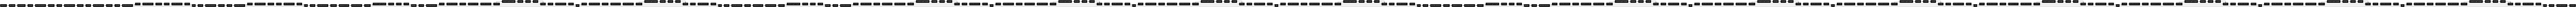

In [15]:

base_model = keras.applications.EfficientNetV2B0(include_top=False, weights='imagenet')

tf.keras.utils.plot_model(
    base_model,
    to_file='base_model.png',
    show_shapes=False,
    show_layer_names=False,
    rankdir='LR',
    expand_nested=False,
    dpi=96
)

In [16]:
# Freeze the feature extractor (base model) to retain pre-trained weights
# and prevent updates during backpropagation
for layer in base_model.layers:
  layer.trainable = False


## Adding our own Classifier network - Transfer learning

The original `EfficientNetV2B0` Classifier network:

- GlobalAveragePooling2D
- Dense (1000 units with softmax activation)

Our Classifier network for Felis image classification:

- GlobalAveragePooling2D
- Dropout (15%)
- Dense (7 units with softmax activation)

In [17]:
x = keras.layers.GlobalAveragePooling2D()(base_model.output)
x = keras.layers.Dropout(0.15)(x)
output_ = keras.layers.Dense(units=8, activation='softmax')(x)

model3_TL = keras.models.Model(inputs=[base_model.input], outputs=[output_])

## Compiling and training the model

In [18]:
model3_TL.compile(loss='sparse_categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

callbacks_TL = [
             keras.callbacks.ModelCheckpoint("bestTL.weights.h5",
                                             monitor='val_accuracy',
                                             save_weights_only=True,
                                             save_best_only=True)]

history_TL = model3_TL.fit(x = X_train_std, y = y_train, epochs=10,
                          validation_split=0.1, batch_size=16, callbacks=callbacks_TL)


Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 67s 2s/step - accuracy: 0.1507 - loss: 2.0362 - val_accuracy: 0.1282 - val_loss: 1.9382
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 29s 43ms/step - accuracy: 0.1296 - loss: 1.9773 - val_accuracy: 0.1282 - val_loss: 1.9113
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.1590 - loss: 1.9230 - val_accuracy: 0.1795 - val_loss: 1.8916
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.1429 - loss: 1.9183 - val_accuracy: 0.1795 - val_loss: 1.8779
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.1922 - loss: 1.9071 - val_accuracy: 0.1795 - val_loss: 1.8605
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.2020 - loss: 1.8950 - val_accuracy: 0.2051 - val_loss: 1.8498
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.1797 - loss: 1.9005 - val_accuracy: 0.1795 - val_loss: 1.8404
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.1871 - loss: 1.8949 - val_accuracy: 0.2308 - v

## Visualising the model's training accuracy

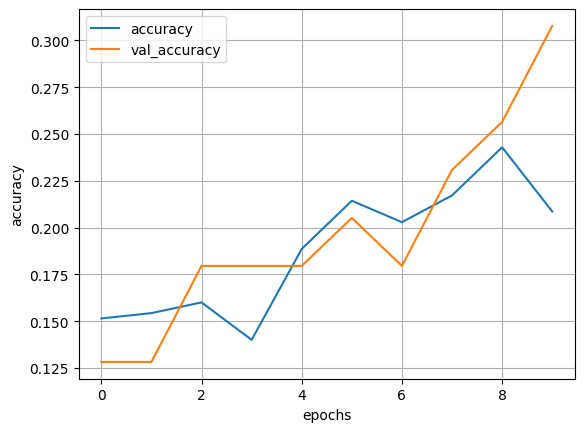

In [19]:
progress = {k:v for k,v in history_TL.history.items() if k in ['accuracy', 'val_accuracy']}

pd.DataFrame(progress).plot()
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.grid(True)
plt.show()

## Evaluating the model

In [20]:
# Loading the model's best weights during training
model3_TL.load_weights("bestTL.weights.h5")

# Test loss and test accuracy
testLoss_TL, testAccuracy_TL = model3_TL.evaluate(x = X_test_std, y = y_test, batch_size=16)
print("Test-loss: %f, Test-accuracy: %f" % (testLoss_TL, testAccuracy_TL))

9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 677ms/step - accuracy: 0.2473 - loss: 1.8621
Test-loss: 1.842312, Test-accuracy: 0.269231


In [21]:
# Making predictions on the test set

y_proba = model3_TL.predict(X_test_std)
y_pred = np.argmax(y_proba, axis=-1)
print(y_pred)

5/5 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step
[0 3 0 0 5 5 1 0 3 1 1 1 0 0 5 3 0 1 5 5 0 0 1 5 5 1 0 0 1 0 1 0 0 0 0 1 0
 1 0 0 0 0 0 5 5 0 0 0 0 0 0 0 0 0 5 0 0 1 0 5 0 0 0 0 1 5 0 0 1 1 5 0 0 5
 1 0 0 0 0 0 1 0 0 3 1 3 0 1 5 1 5 0 5 3 0 5 0 0 0 0 0 5 1 5 5 1 1 0 0 1 0
 0 5 0 0 0 0 0 3 0 0 0 0 5 1 5 0 1 0 5]


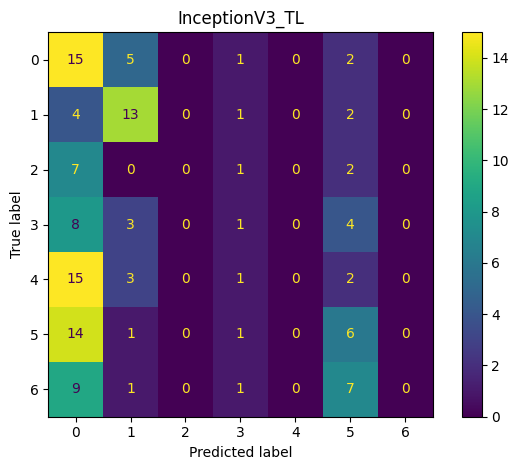

['sand-cat', 'sand-cat', 'sand-cat', 'sand-cat', 'sand-cat', 'sand-cat', 'sand-cat', 'sand-cat', 'sand-cat', 'sand-cat', 'sand-cat', 'sand-cat', 'sand-cat', 'sand-cat', 'sand-cat', 'sand-cat', 'sand-cat', 'sand-cat', 'sand-cat', 'sand-cat', 'sand-cat', 'sand-cat', 'sand-cat', 'sand-cat', 'sand-cat', 'sand-cat', 'sand-cat', 'sand-cat', 'sand-cat', 'sand-cat', 'sand-cat', 'sand-cat', 'sand-cat', 'sand-cat', 'sand-cat', 'sand-cat', 'sand-cat', 'sand-cat', 'sand-cat', 'sand-cat', 'sand-cat', 'sand-cat', 'sand-cat', 'sand-cat', 'sand-cat', 'sand-cat', 'sand-cat', 'sand-cat', 'sand-cat', 'sand-cat', 'sand-cat', 'sand-cat', 'sand-cat', 'sand-cat', 'sand-cat', 'sand-cat', 'sand-cat', 'sand-cat', 'sand-cat', 'sand-cat', 'sand-cat', 'sand-cat', 'sand-cat', 'sand-cat', 'sand-cat', 'sand-cat', 'sand-cat', 'sand-cat', 'sand-cat', 'sand-cat', 'sand-cat', 'sand-cat', 'jungle-cat', 'jungle-cat', 'jungle-cat', 'jungle-cat', 'jungle-cat', 'jungle-cat', 'jungle-cat', 'jungle-cat', 'jungle-cat', 'jungle-c

In [22]:
# Confusion Matrix of the model's predictions on the test data

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred))
cm.plot()
plt.title("InceptionV3_TL")
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.savefig("ConfMat_InceptionV3_TL.png", dpi=300, format='png', pad_inches=0.3)
plt.show()

print(labels)

In [23]:
# Classification report

from sklearn.metrics import classification_report

clf_report = classification_report(y_test, y_pred)
print(clf_report)

              precision    recall  f1-score   support

           0       0.21      0.65      0.32        23
           1       0.50      0.65      0.57        20
           2       0.00      0.00      0.00        10
           3       0.14      0.06      0.09        16
           4       0.00      0.00      0.00        21
           5       0.24      0.27      0.26        22
           6       0.00      0.00      0.00        18

    accuracy                           0.27       130
   macro avg       0.16      0.23      0.17       130
weighted avg       0.17      0.27      0.20       130



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Saving the model and dataset
So that it can be later used for Fine Tuning

In [24]:
# Save the model in the native Keras format
model3_TL.save('/content/drive/MyDrive/Models/EfficientNetV2_TransferLearning_BestModel.keras')


In [25]:
import os
from numpy import save

# Ensure the directory exists
os.makedirs('/content/drive/MyDrive/Models', exist_ok=True)

save('/content/drive/MyDrive/Models/X_train_std.npy', X_train_std)
save('/content/drive/MyDrive/Models/X_test_std.npy', X_test_std)

save('/content/drive/MyDrive/Models/y_train.npy', y_train)
save('/content/drive/MyDrive/Models/y_test.npy', y_test)
